In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

In [4]:
my_model = load_model("/home/salogosm/code/machine learning with python/OpenCV projects/Mam's ML project/final_project/models/colab_models/v2_models/Vowel_model_gray_v2.h5")

2024-02-05 00:02:15.681427: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 128)       

In [18]:
my_model.layers[0].name

'conv2d_4'

In [7]:
# Load a test image (replace 'path_to_your_image.jpg' with the actual path)
img_path = '/home/salogosm/Pictures/samples/3photo_2024-01-23_16-20-44.jpg'
img = image.load_img(img_path, target_size=(50, 50), color_mode='grayscale')
img_array = img_to_array(img)
img_array /= 255.0  # Normalize the image

In [8]:
# Function to plot feature maps for a specific layer
def plot_feature_maps(model, layer_name, input_image):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    feature_maps = intermediate_layer_model.predict(np.expand_dims(input_image, axis=0))
    num_filters = feature_maps.shape[-1]
    
    plt.figure(figsize=(15, 15))
    for i in range(num_filters):
        plt.subplot(4, num_filters // 4, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 170ms/step


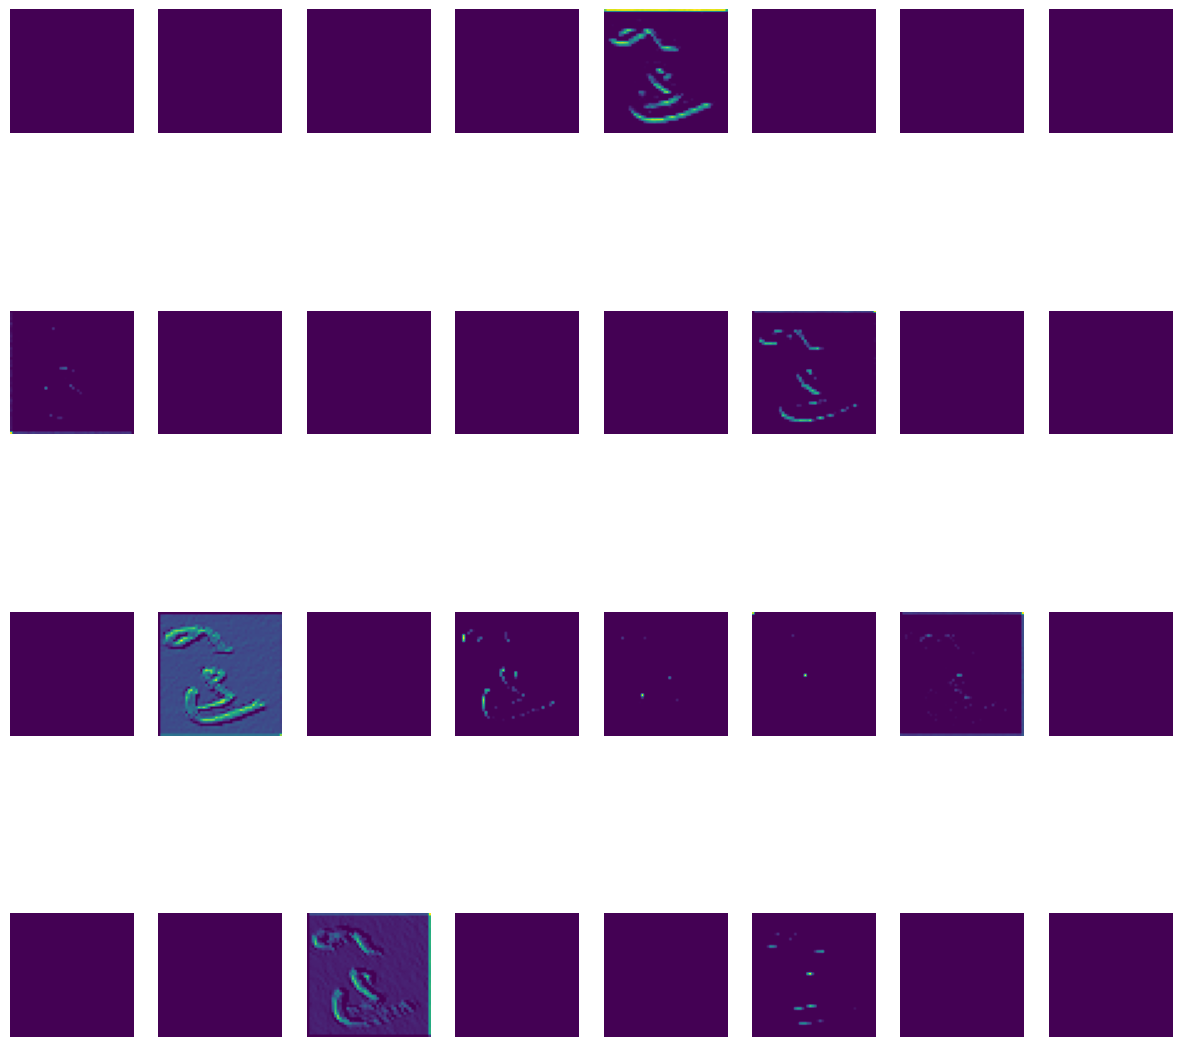

1/1 [==============================] - 0s 69ms/step


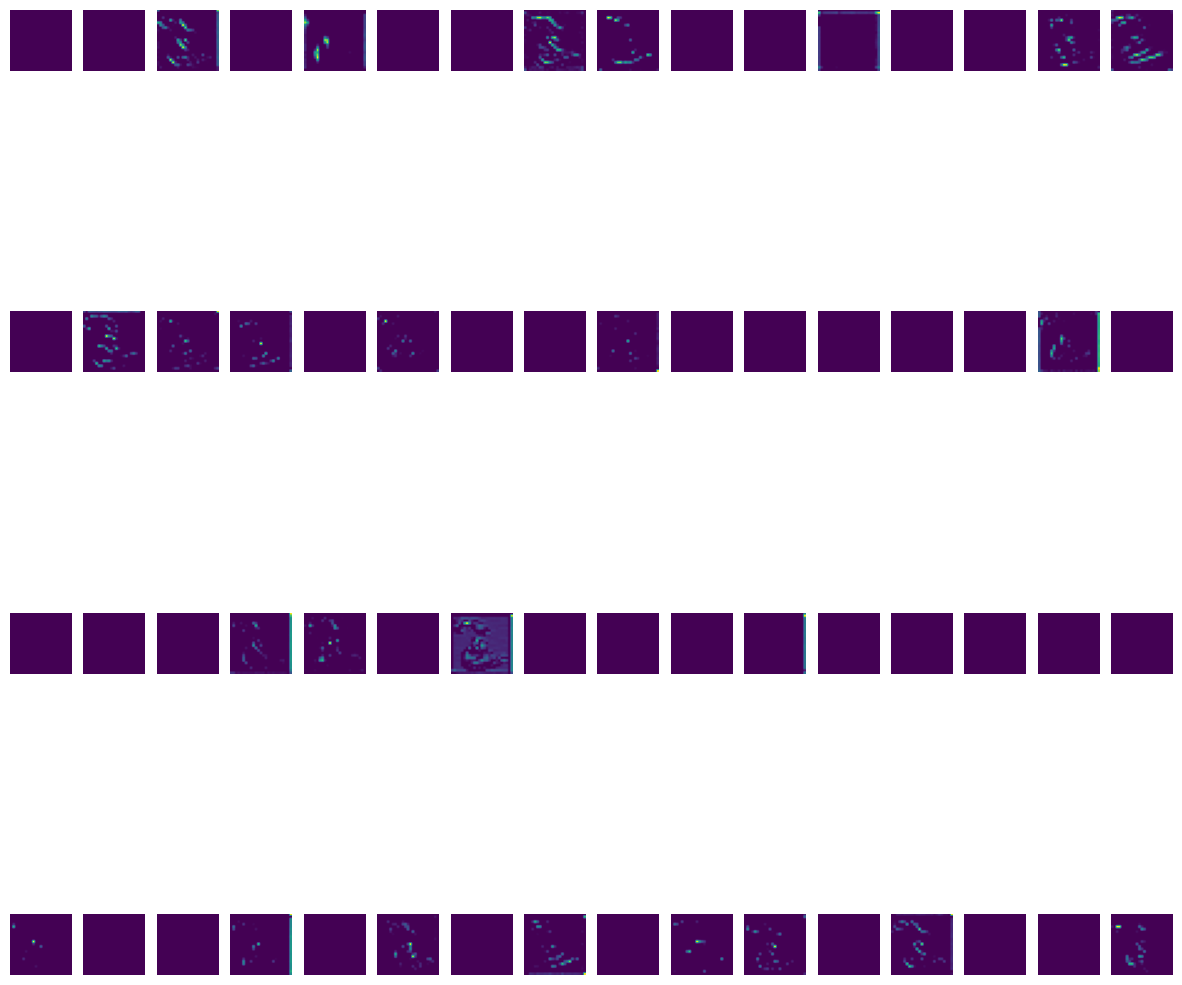

1/1 [==============================] - 0s 58ms/step


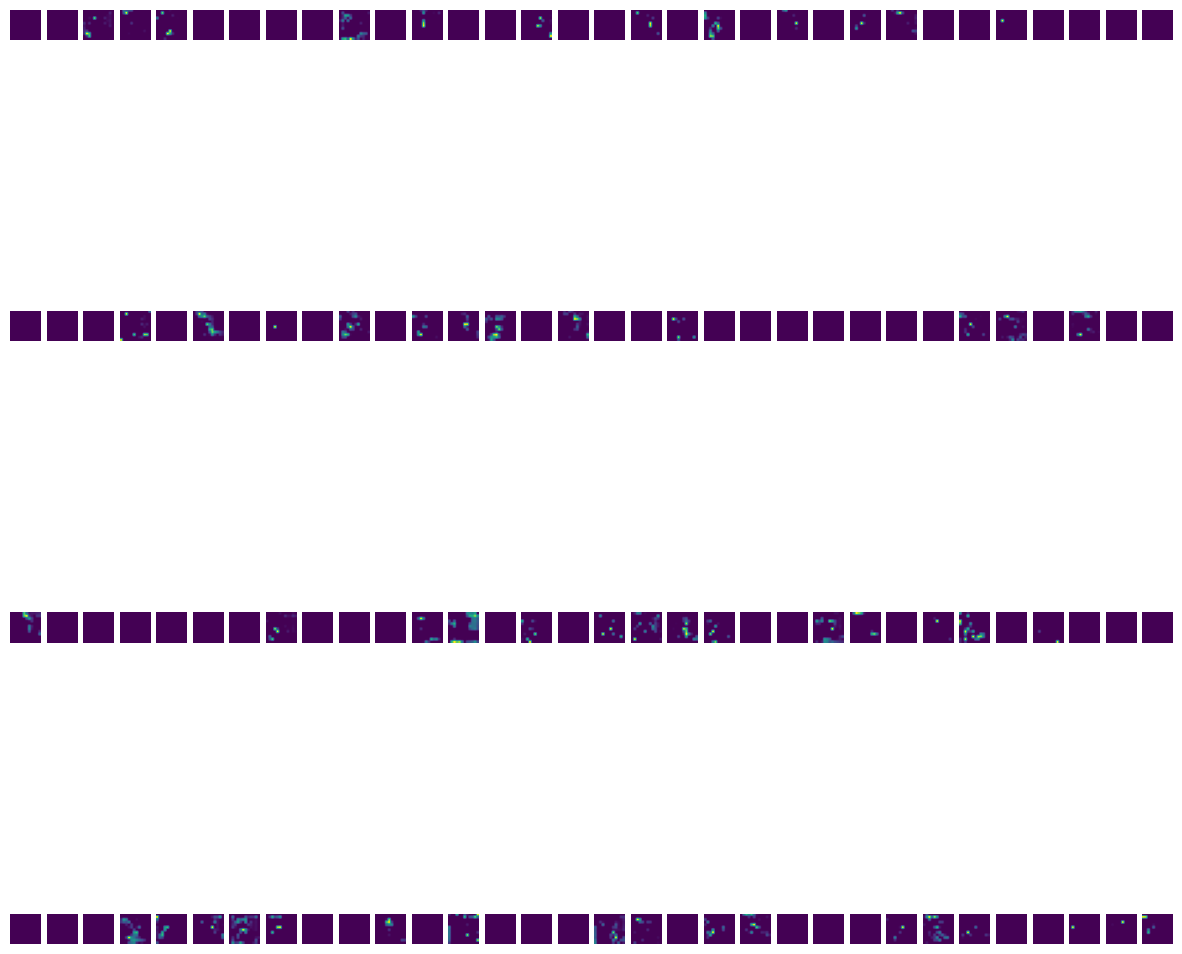

1/1 [==============================] - 0s 57ms/step


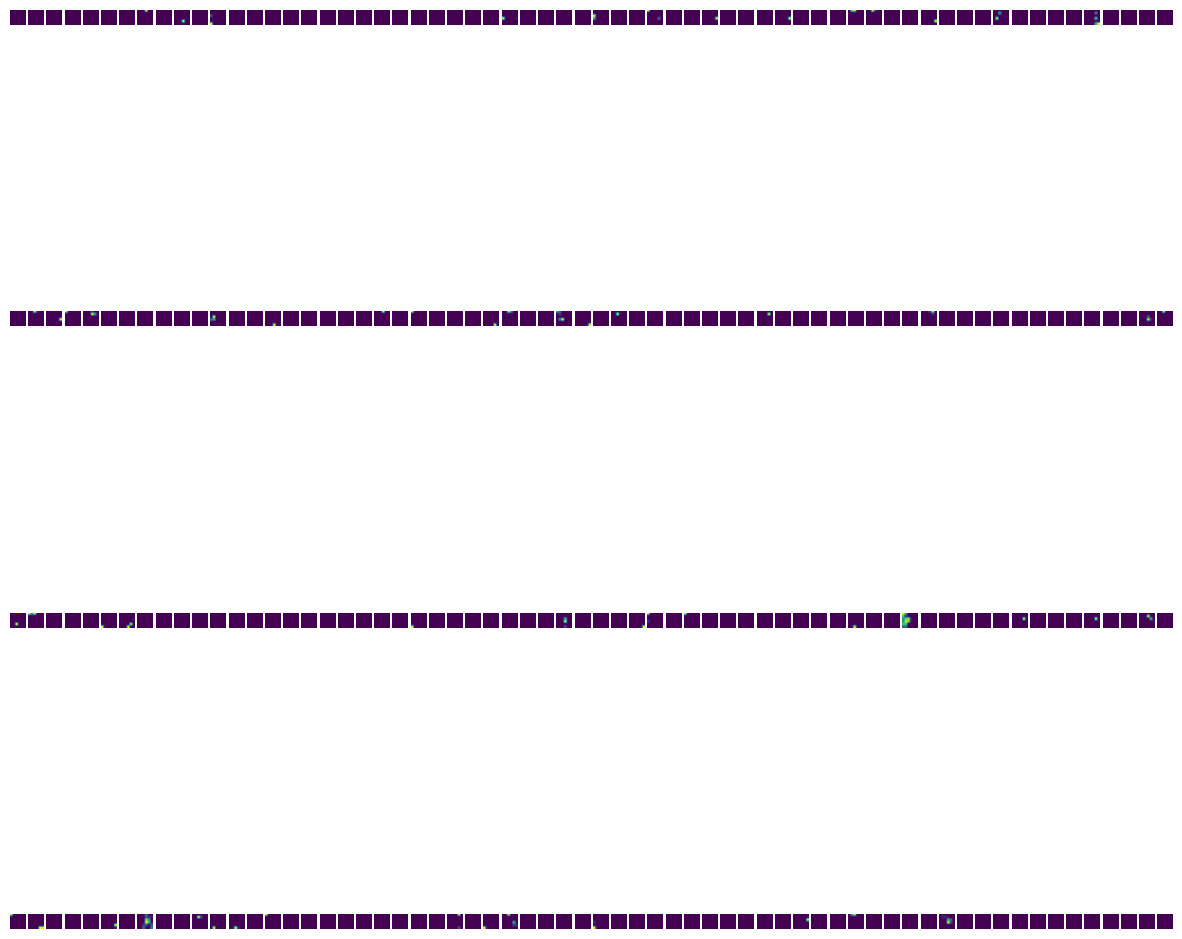

In [19]:
# Visualize feature maps at every convolutional layer
conv_layer_names = ['conv2d_4', 'conv2d_5', 'conv2d_6', 'conv2d_7']
for layer_name in conv_layer_names:
    plot_feature_maps(my_model, layer_name, img_array)

1/1 [==============================] - 0s 48ms/step


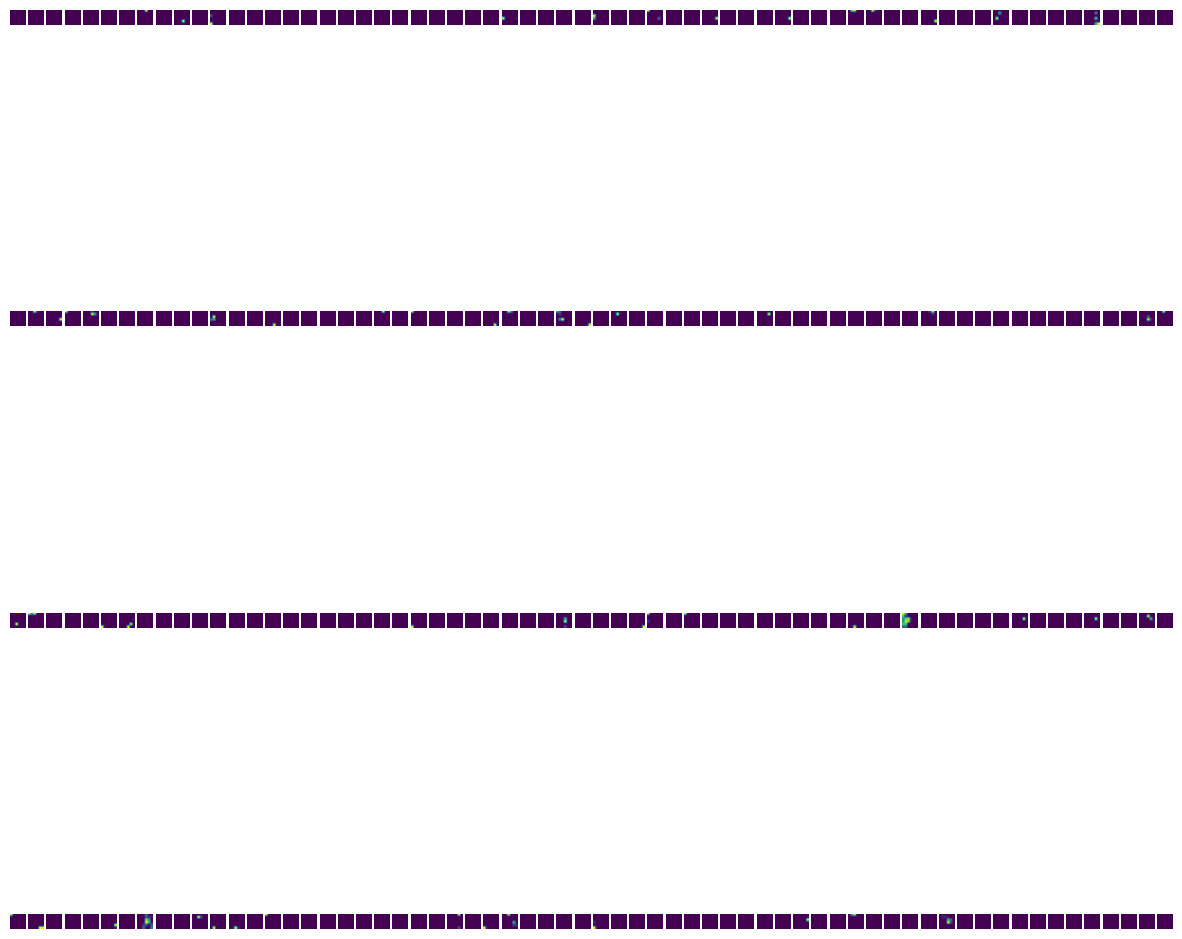

In [20]:
plot_feature_maps(my_model, "conv2d_7", img_array)

In [21]:
my_model.predict(img_array)

ValueError: in user code:

    File "/home/salogosm/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/salogosm/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/salogosm/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/salogosm/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/salogosm/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'max_pooling2d_4' (type MaxPooling2D).
    
    Negative dimension size caused by subtracting 2 from 1 for '{{node sequential_1/max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_1/conv2d_4/Relu)' with input shapes: [?,50,1,32].
    
    Call arguments received by layer 'max_pooling2d_4' (type MaxPooling2D):
      • inputs=tf.Tensor(shape=(None, 50, 1, 32), dtype=float32)
